In [1]:
import tweepy
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from config import consumer_key, consumer_secret, app_key, app_secret
import code
# code.interact(local=dict(globals(), **locals()))
# ^^ debugging line

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [2]:
news_handles = ["@BBC", "@CBS", "@CNN", "@FoxNews", "@nytimes"]
merged = []

In [4]:
def news_sentiments(twitter_handles):
    
    for handle in twitter_handles:
        sentiments = []
      
        for idx, tweet in enumerate(tweepy.Cursor(api.user_timeline, id=handle ).items(100)):
            tweet = tweet._json
            results = analyzer.polarity_scores(tweet["text"])
            compound = results["compound"]
            positive = results["pos"]
            negative = results["neg"]
            neutral = results["neu"]

            sentiments.append({"date": tweet["created_at"],
                               "handle": handle, 
                               "compound": compound,
                               "positive": positive,
                               "negative": negative,
                               "neutral": neutral,
                               "tweets_ago": idx,
                               "text": tweet["text"]})

        merged.append(sentiments)
        
news_sentiments(news_handles)

In [6]:
flatter = merged[0] + merged[1] + merged[2] + merged[3] + merged[4]
df = pd.DataFrame(flatter)
# df.head(110)

compound                            date handle  negative  neutral  \
0      0.0000  Mon Jul 02 07:27:05 +0000 2018   @BBC     0.000    1.000   
1      0.0000  Mon Jul 02 07:03:02 +0000 2018   @BBC     0.000    1.000   
2      0.8299  Sun Jul 01 20:43:50 +0000 2018   @BBC     0.000    0.710   
3      0.6588  Sun Jul 01 19:36:52 +0000 2018   @BBC     0.000    0.845   
4      0.4019  Sun Jul 01 19:27:02 +0000 2018   @BBC     0.000    0.870   
5     -0.2957  Sun Jul 01 19:02:03 +0000 2018   @BBC     0.176    0.657   
6     -0.0516  Sun Jul 01 18:00:19 +0000 2018   @BBC     0.273    0.515   
7      0.5994  Sun Jul 01 17:58:17 +0000 2018   @BBC     0.000    0.822   
8      0.0000  Sun Jul 01 17:07:02 +0000 2018   @BBC     0.000    1.000   
9      0.0000  Sun Jul 01 16:32:14 +0000 2018   @BBC     0.000    1.000   
10     0.0000  Sun Jul 01 16:06:03 +0000 2018   @BBC     0.000    1.000   
11     0.0000  Sun Jul 01 15:07:02 +0000 2018   @BBC     0.000    1.000   
12     0.9096  Sun Jul 01 14:19:37 +0000 2018   @BBC     0.000    0.582   
13     0.5574  Sun Jul 01 13:32:20 +0000 2018   @BBC     0.000    0.841   
14     0.0516  Sun Jul 01 13:08:41 +0000 2018   @BBC     0.252    0.485   
15     0.5859  Sun Jul 01 13:04:05 +0000 2018   @BBC     0.000    0.678   
16    -0.2960  Sun Jul 01 11:53:09 +0000 2018   @BBC     0.145    0.855   
17     0.7269  Sun Jul 01 11:52:12 +0000 2018   @BBC     0.000    0.747   
18     0.0000  Sun Jul 01 11:04:03 +0000 2018   @BBC     0.000    1.000   
19    -0.7003  Sun Jul 01 10:08:02 +0000 2018   @BBC     0.266    0.734   
20     0.4303  Sun Jul 01 09:03:08 +0000 2018   @BBC     0.070    0.742   
21     0.0000  Sun Jul 01 08:07:00 +0000 2018   @BBC     0.000    1.000   
22    -0.1280  Sun Jul 01 07:04:01 +0000 2018   @BBC     0.133    0.753   
23     0.5707  Sat Jun 30 19:56:38 +0000 2018   @BBC     0.000    0.850   
24    -0.5106  Sat Jun 30 19:50:50 +0000 2018   @BBC     0.356    0.491   
25    -0.6705  Sat Jun 30 19:27:05 +0000 2018   @BBC     0.234    0.766   
26     0.0000  Sat Jun 30 18:28:48 +0000 2018   @BBC     0.000    1.000   
27     0.0000  Sat Jun 30 18:12:00 +0000 2018   @BBC     0.000    1.000   
28     0.3802  Sat Jun 30 17:04:00 +0000 2018   @BBC     0.000    0.834   
29     0.0000  Sat Jun 30 16:04:06 +0000 2018   @BBC     0.000    1.000   
..        ...                             ...    ...       ...      ...   
80     0.6114  Wed Jun 27 08:47:40 +0000 2018   @BBC     0.050    0.756   
81     0.0000  Wed Jun 27 08:01:05 +0000 2018   @BBC     0.000    1.000   
82     0.5106  Wed Jun 27 07:29:04 +0000 2018   @BBC     0.051    0.791   
83     0.4939  Wed Jun 27 07:01:05 +0000 2018   @BBC     0.000    0.856   
84     0.0000  Tue Jun 26 21:20:15 +0000 2018   @BBC     0.000    1.000   
85     0.0000  Tue Jun 26 19:05:08 +0000 2018   @BBC     0.000    1.000   
86     0.2960  Tue Jun 26 18:03:06 +0000 2018   @BBC     0.074    0.792   
87     0.0000  Tue Jun 26 17:02:02 +0000 2018   @BBC     0.000    1.000   
88     0.0000  Tue Jun 26 16:33:41 +0000 2018   @BBC     0.000    1.000   
89     0.0000  Tue Jun 26 16:00:15 +0000 2018   @BBC     0.000    1.000   
90     0.0000  Tue Jun 26 14:52:03 +0000 2018   @BBC     0.000    1.000   
91     0.8360  Tue Jun 26 14:32:33 +0000 2018   @BBC     0.000    0.683   
92     0.6114  Tue Jun 26 13:12:16 +0000 2018   @BBC     0.000    0.818   
93     0.0000  Tue Jun 26 12:58:04 +0000 2018   @BBC     0.000    1.000   
94     0.5267  Tue Jun 26 12:02:04 +0000 2018   @BBC     0.000    0.673   
95     0.0000  Tue Jun 26 11:02:03 +0000 2018   @BBC     0.000    1.000   
96     0.0000  Tue Jun 26 09:30:00 +0000 2018   @BBC     0.000    1.000   
97    -0.2732  Tue Jun 26 08:00:16 +0000 2018   @BBC     0.139    0.861   
98    -0.7717  Tue Jun 26 07:26:08 +0000 2018   @BBC     0.295    0.705   
99     0.5994  Tue Jun 26 07:00:12 +0000 2018   @BBC     0.000    0.738   
100    0.0000  Wed Jun 27 20:31:32 +0000 2018   @CBS     0.000    1.000   
101    0.7574  Wed Jun 27 14:0

In [7]:
df.to_csv("tweets_and_sentiments.csv")

In [19]:
conditions = [
    (df["handle"] == "@BBC"),
    (df["handle"] == "@CBS"),
    (df["handle"] == "@CNN"),
    (df["handle"] == "@FoxNews"),
    (df["handle"] == "@nytimes")]
choices = [ "blue", "green", "red", "gold", "purple"]
df['handle_color'] = np.select(conditions, choices)

In [42]:
# df.head(110)

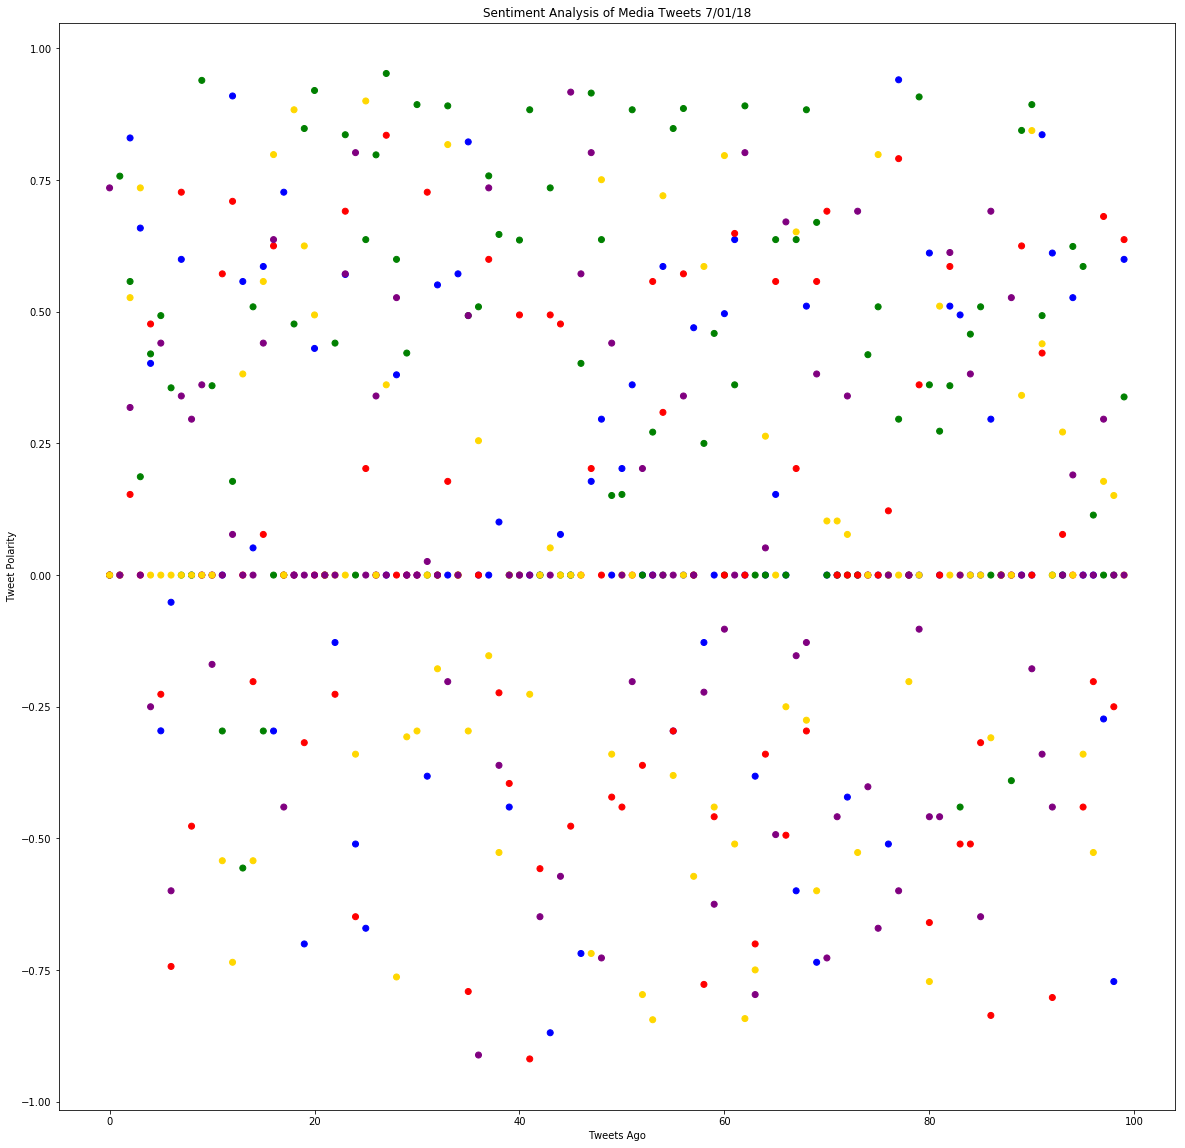

In [40]:
plt.figure(figsize=(20, 20))
plt.scatter(df["tweets_ago"], df["compound"], c = df.handle_color)
plt.xlabel('Tweets Ago')
plt.ylabel('Tweet Polarity')
plt.title('Sentiment Analysis of News Tweets July 1 2018')
plt.savefig('tweet_sentiment_scatter.png')

In [35]:
mean_compound = df.groupby(['handle']).compound.mean().reset_index()
mean_compound

handle  compound
0      @BBC  0.089617
1      @CBS  0.340684
2      @CNN  0.013163
3  @FoxNews  0.000705
4  @nytimes  0.029591

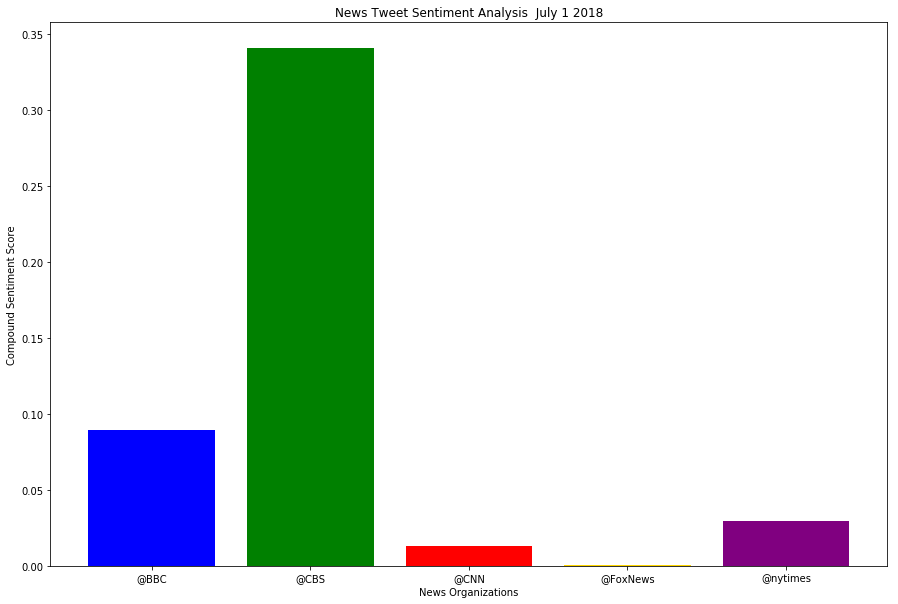

In [41]:
plt.figure(figsize=(15, 10))
plt.bar(mean_compound['handle'], mean_compound['compound'],
        color=[ "blue", "green", "red", "gold", "purple"] )
plt.xlabel('News Organizations')
plt.ylabel('Compound Sentiment Score')
plt.title('News Tweet Sentiment Analysis  July 1 2018')
plt.savefig('tweet_sentiment_hist.png')

### Observations

1. These samples of 100 tweets are such small windows that general statements about the sentiment of one of these media organizations would be misleading. Content tweeted varies greatly by time of day and day of week as well in response to current events. It may however be useful to use with even smaller sizes to gather sentiment during a live-tweeted event like a State of the Union address.
2. CBS was overwhelmingly the most positive and Fox was significantly the least. 
3. However, none the organizations average compound scores were negative. While there are many tweets that are neutral, the skew is enough to rank them all positive in sentiment polarity. This may simply be due to the sample of tweets pulled, but for true analysis digging into the fundamentals of VADER would be necessary.